In [13]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn.metrics import r2_score


'''
Author: Enrico Ceccolini
    TODO write the description
'''

#datadir = "/datasets/eurora_data/db/"
datadir = "/datasets/eurora_data/db1/"
infile_jobs = datadir + "jobs.csv"

# settings
interval_comment = "WholeData"
suffix = "_1min_"

nodes_data = pd.read_csv(infile_jobs, index_col=0)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
jobs_whole_data = pd.read_csv(infile_jobs)
print("jobs_whole_data contains {} records".format(jobs_whole_data.shape[0]))

jobs_whole_data contains 405771 records


In [15]:
jobs_whole_data.head(1)

,job_id,job_id_string,job_name,queue,start_time,run_start_time,end_time,user,node_req,cpu_req,mem_req,time_req,deleted,dependency,exit_status,pbs_exit_code
0,1,498458.node129,rth2e6t0,parallel,2014-03-31 00:30:02,2014-03-31 00:30:02,2014-03-31 01:22:40,alupi000@node129.eurora.cineca.it,1,16,14,04:00,NaN,NaN,COMPLETED,NaN


In [16]:
completed_jobs_data = jobs_whole_data[jobs_whole_data.end_time != '0000-00-00 00:00:00']
print("completed_jobs_data contains {} records".format(completed_jobs_data.shape[0]))
completed_jobs_data = completed_jobs_data.dropna(subset=['run_start_time', 'end_time'])
print("completed_jobs_data contains {} records".format(completed_jobs_data.shape[0]))

completed_jobs_data contains 404871 records
completed_jobs_data contains 404871 records


In [17]:
completed_jobs_data['duration'] = pd.to_datetime(completed_jobs_data['end_time']) - pd.to_datetime(completed_jobs_data['run_start_time'])

In [23]:
completed_jobs_data['duration'].astype('timedelta64[s]').head()

0     3158.0
1      202.0
2    14439.0
3    14476.0
4     3267.0
Name: duration, dtype: float64

In [61]:
completed_jobs_data[completed_jobs_data['duration'] < np.timedelta64(1, 'm')].shape

(333285, 17)

In [71]:
completed_jobs_data[completed_jobs_data['duration'] < np.timedelta64(30, 'm')].shape

(365673, 17)

In [72]:
365673 - 333285

32388

In [62]:
completed_jobs_data[completed_jobs_data['duration'] < np.timedelta64(1, 'h')].shape

(373061, 17)

In [73]:
373061 - 365673

7388

In [64]:
completed_jobs_data[completed_jobs_data['duration'] < np.timedelta64(4, 'h')].shape

(392106, 17)

In [66]:
392106 - 373061

19045

In [94]:
completed_jobs_data[completed_jobs_data['duration'] < np.timedelta64(10, 'h')].shape

(404705, 17)

In [95]:
404705 - 392106

12599

In [96]:
completed_jobs_data[completed_jobs_data['duration'] > np.timedelta64(10, 'h')].shape

(166, 17)

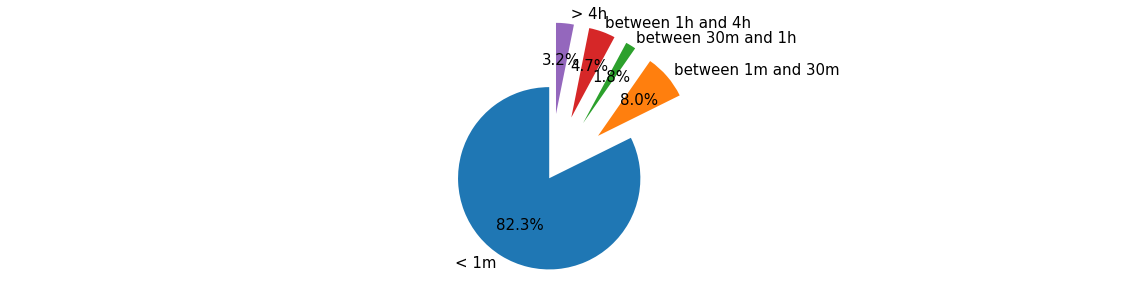

In [106]:
import matplotlib.pyplot as plt
 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '< 1m', 'between 1m and 30m', 'between 30m and 1h', 'between 1h and 4h', ' > 4h'
sizes = [333285, 32388, 7388, 19045, 12760]
explode = (0.01, 0.7, 0.7, 0.7, 0.7) # explode 'Milk' a little away
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
 
#plt.title('Average Monthly Consumption')
 
plt.show()

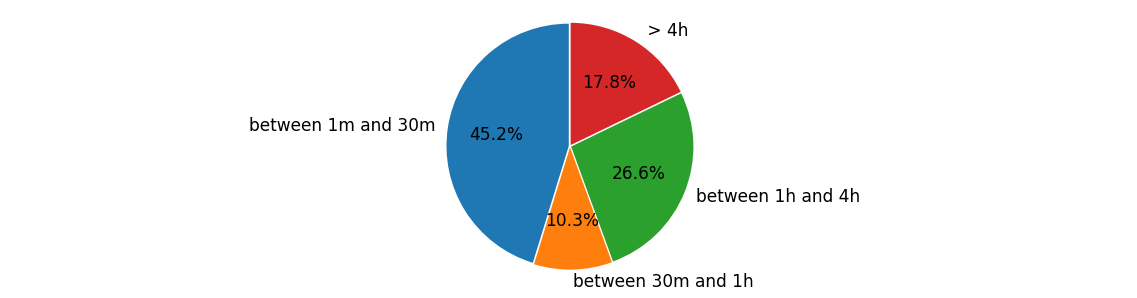

In [109]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'between 1m and 30m', 'between 30m and 1h', 'between 1h and 4h', ' > 4h'
sizes = [32388, 7388, 19045, 12760]
explode = (0.01, 0.01, 0.01, 0.01) # explode 'Milk' a little away
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.tick_params(labelsize=15)
#plt.title('Jobs duration', fontsize=20)
 
plt.show()

In [19]:
#np.timedelta64(1, 'm')

In [58]:
def plot_hist(data, n_bins):
    plt.rcParams['figure.figsize'] = (20,5)
    #n, bins, patches = plt.hist(data, n_bins, facecolor='blue', alpha=1)
    #plt.axis([0, 15000, 0, 8200])
    plt.xlabel("duration")
    plt.ylabel("num instances")
    plt.show()

In [46]:
#plot_hist(completed_jobs_data['duration'].astype('timedelta64[s]'), 1000)

In [43]:
large_jobs = completed_jobs_data[pd.to_datetime(completed_jobs_data['end_time']) - pd.to_datetime(completed_jobs_data['run_start_time']) > np.timedelta64(1, 'm')]
print("large jobs (running time > 1 min) contains {} jobs".format(large_jobs.shape[0]))

large jobs (running time > 1 min) contains 71457 jobs


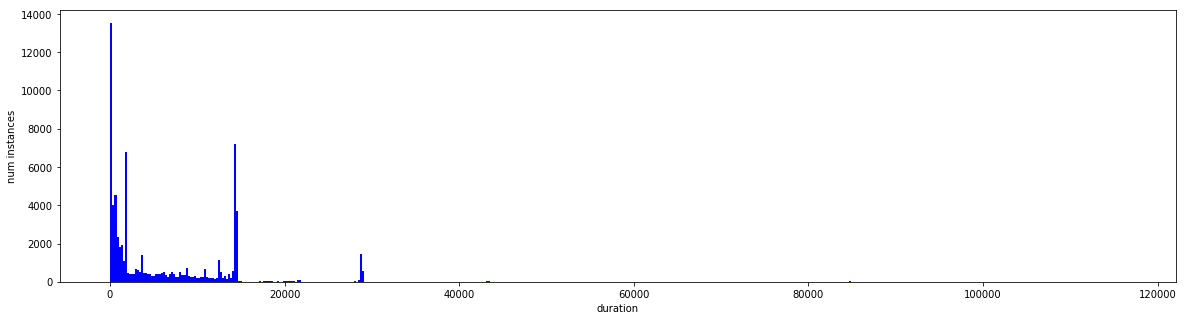

In [59]:
plot_hist(large_jobs['duration'].astype('timedelta64[s]'), 500)